#   Extracción de características para reducir la Dimensionalidad
##  ¿Qué aprenderemos hoy?
-   Análisis de Componentes Principales (PCA)
#   Análisis de Componentes Principales
-   Algoritmo de Aprendizaje No Supervisado.
-   Transforma o proyecta (linealmente) los datos en un nuevo espacio de características.

En el contexto de la reducción de la dimensionalidad, la extracción de características puede entenderse como un enfoque de compresión de datos con el objetivo de mantener la mayor parte de la información relevante.

En la práctica, la extracción de características no sólo se utiliza para mejorar el espacio de almacenamiento (en memoria) o la eficiencia computacional del algoritmo de aprendizaje, sino que también puede mejorar el
rendimiento predictivo, al reducir la maldición de la dimensionalidad, especialmente si trabajamos con modelos no regularizados.

PCA nos ayuda a identificar patrones basados en la correlación entre las características. De esta manera, PCA tiene como objetivo encontrar las direcciones de máxima varianza en los datos y los proyecta en un nuevo
subespacio con dimensión igual o menor que el original. Los ejes ortogonales (componentes principales) del nuevo subespacio pueden interpretarse como las direcciones de máxima varianza dada la restricción de que los
nuevos ejes de características son ortogonales entre sí.

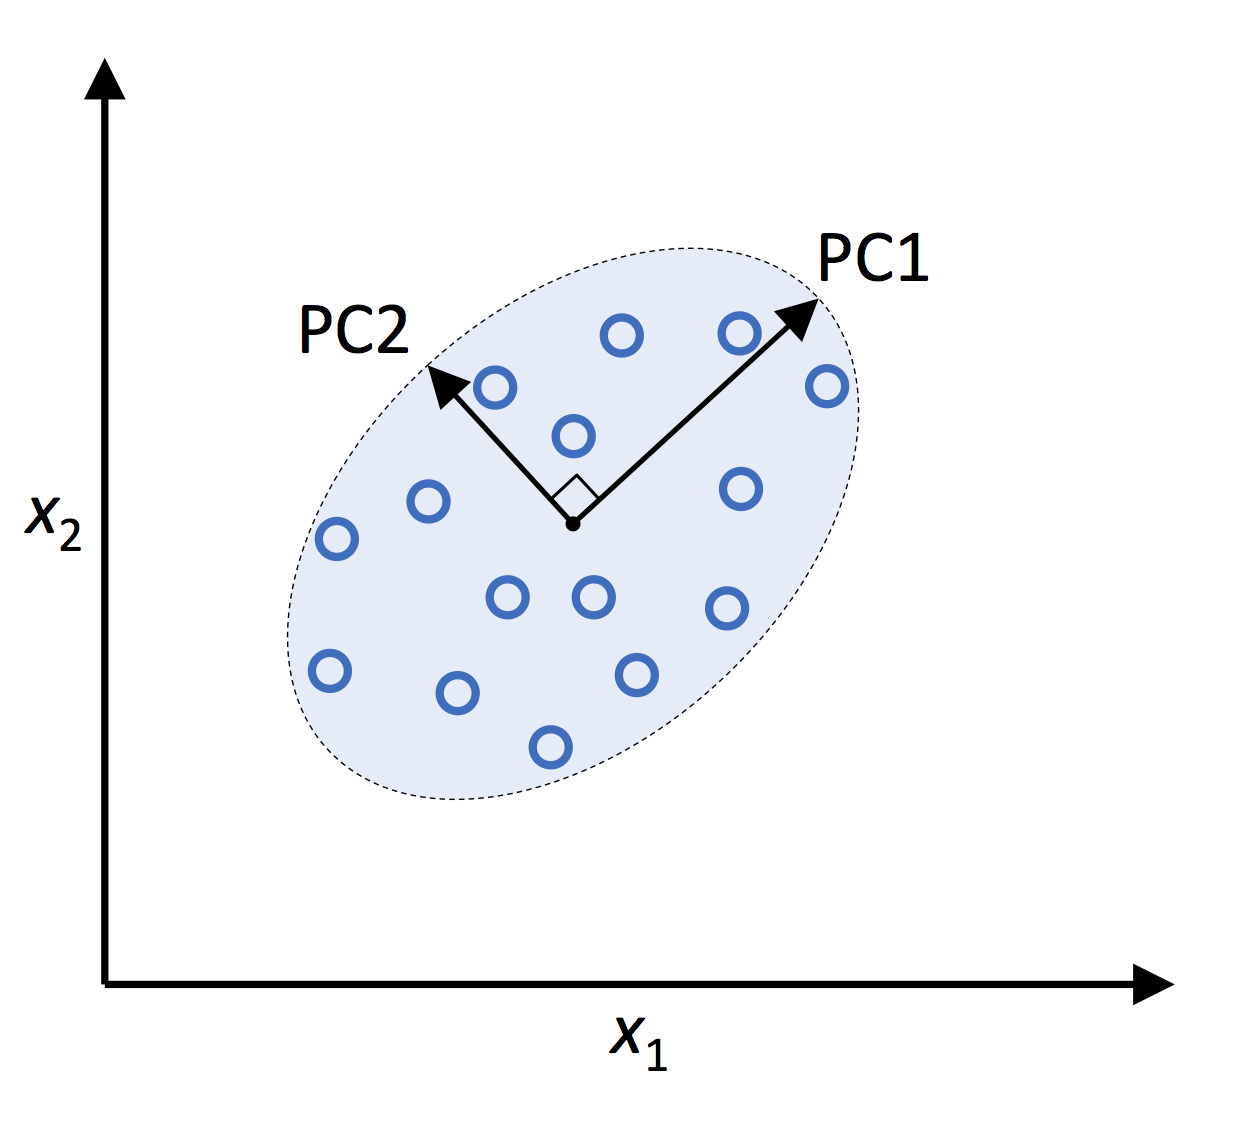

In [418]:
from IPython.display import Image
Image(filename=r'Imagenes_clase_8/8_1.png', width=500)


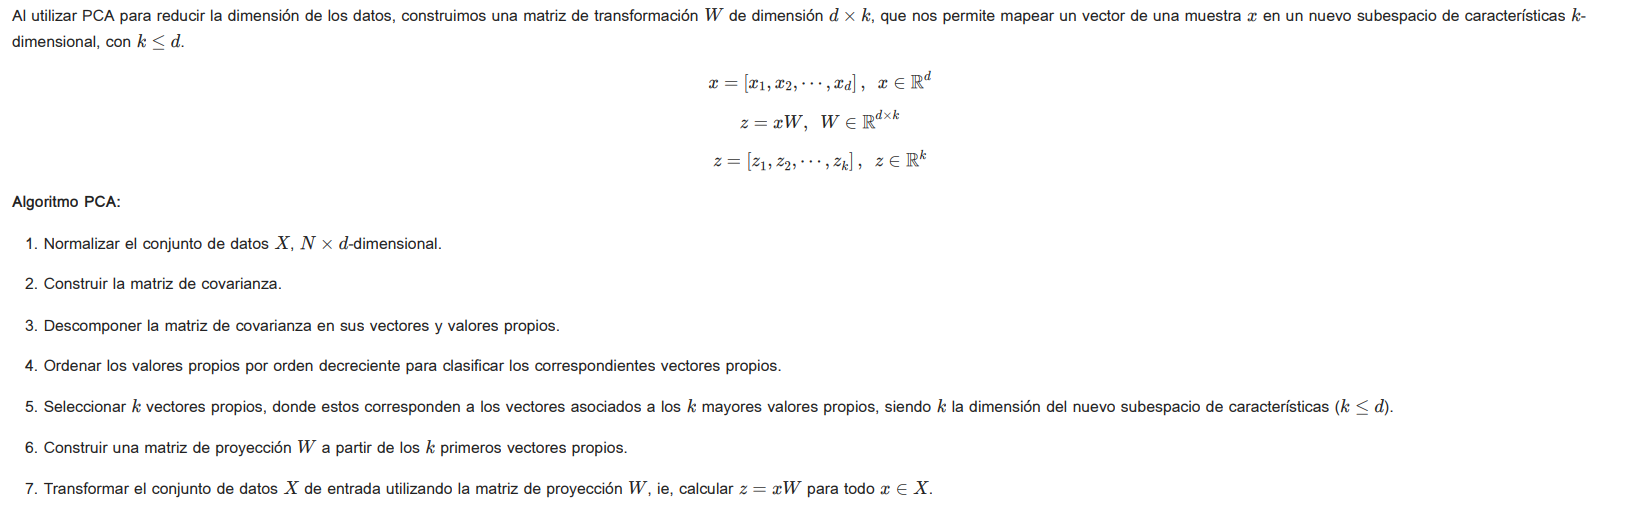

In [419]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [420]:
df_wine['Class label'].value_counts()


2    71
1    59
3    48
Name: Class label, dtype: int64

In [421]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)


**Paso 1: Estandarizar**

In [422]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

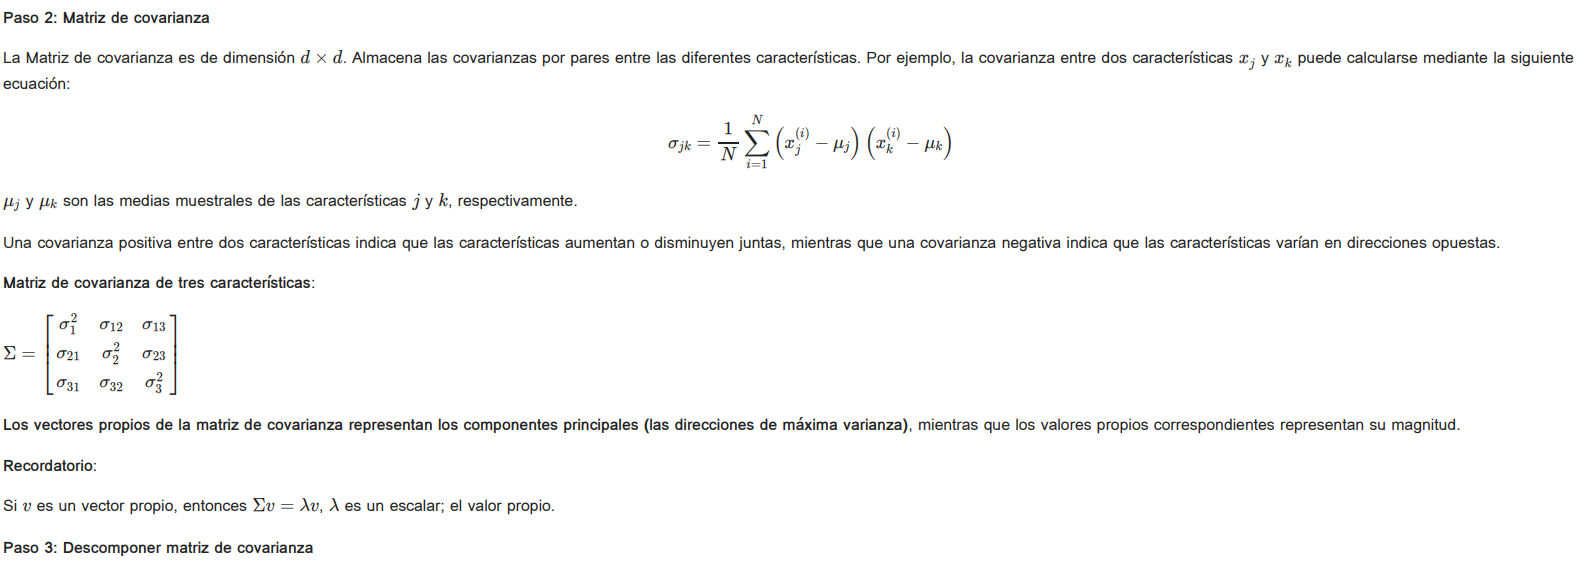

In [423]:
import numpy as np
print(f'Dimensiones de X_train_std: {X_train_std.shape}')

Dimensiones de X_train_std: (124, 13)


In [424]:
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

In [425]:
cov_mat.shape


(13, 13)

In [426]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nValores Propios: \n%s' % eigen_vals)



Valores Propios: 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


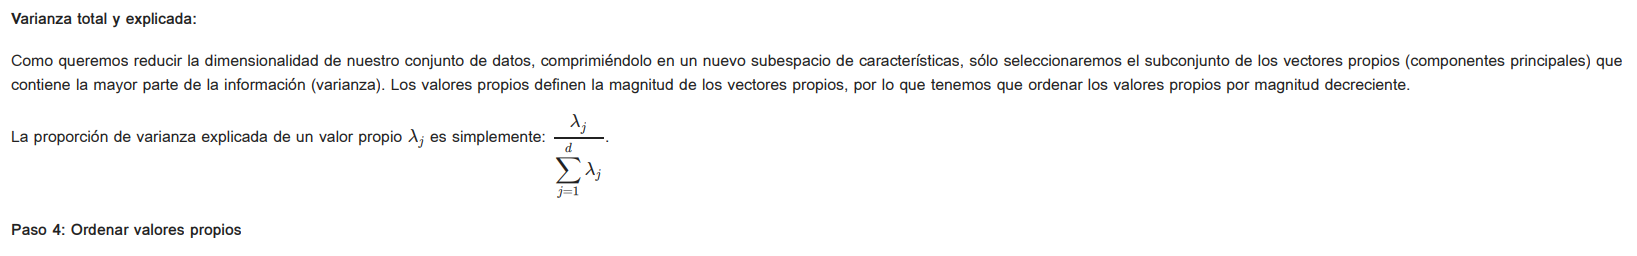

In [427]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(np.array(var_exp))
print(cum_var_exp)


[0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]
[0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639
 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391
 1.        ]


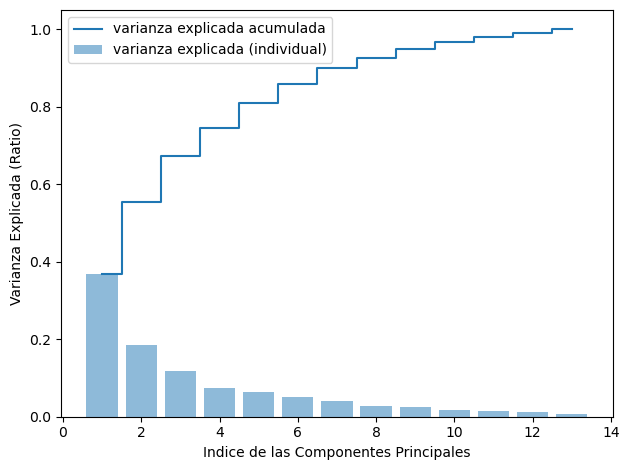

In [428]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='varianza explicada (individual)')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='varianza explicada acumulada')
plt.ylabel('Varianza Explicada (Ratio)')
plt.xlabel('Indice de las Componentes Principales')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

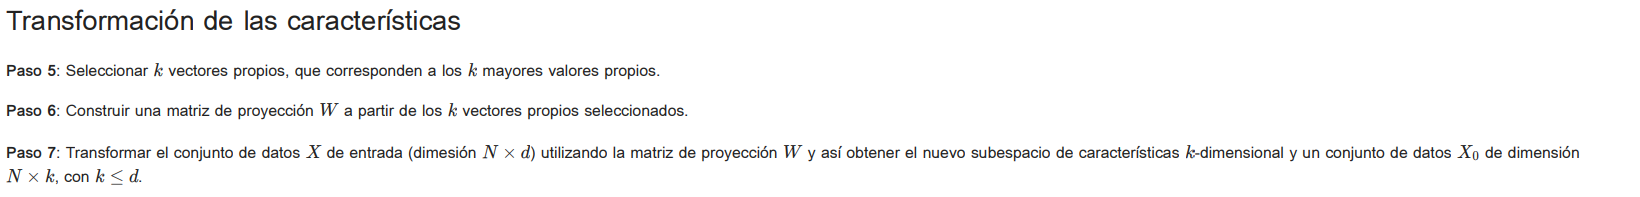

In [429]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352273,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203547,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977379,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578419,
  array([ 0.29062523, -0.08953787,  0.16083499, -0.05158734, -0.67648707,
          0.11851114

In [430]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs


[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352273,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203547,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977379,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578419,
  array([ 0.29062523, -0.08953787,  0.16083499, -0.05158734, -0.67648707,
          0.11851114

In [431]:
print(eigen_pairs[0][1])


[-0.13724218  0.24724326 -0.02545159  0.20694508 -0.15436582 -0.39376952
 -0.41735106  0.30572896 -0.30668347  0.07554066 -0.32613263 -0.36861022
 -0.29669651]


In [432]:
eigen_pairs[0][1][:, np.newaxis]


array([[-0.13724218],
       [ 0.24724326],
       [-0.02545159],
       [ 0.20694508],
       [-0.15436582],
       [-0.39376952],
       [-0.41735106],
       [ 0.30572896],
       [-0.30668347],
       [ 0.07554066],
       [-0.32613263],
       [-0.36861022],
       [-0.29669651]])

In [433]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matriz W:\n', w)
print('Dim W:\n', w.shape)


Matriz W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]
Dim W:
 (13, 2)


In [434]:
X_train_std[0]


array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [435]:
X_train_std[0].dot(w)


array([2.38299011, 0.45458499])

In [436]:
X_train_std[15].dot(w)


array([2.85996853, 2.28819559])

**Ahora X_0=XW**

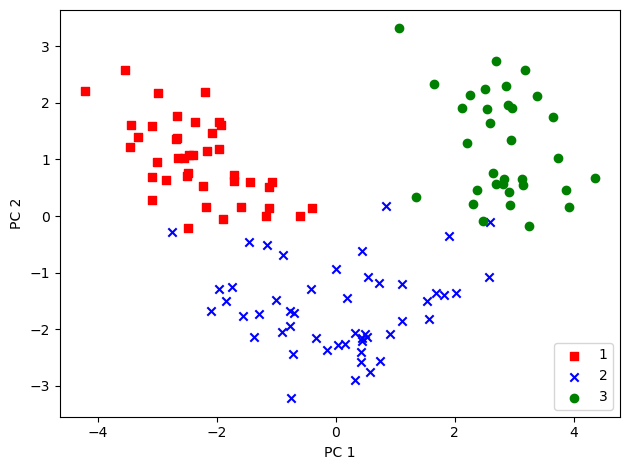

In [437]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],X_train_pca[y_train == l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()


#   PCA con Scikit-Learn
-   [Documentacion](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [438]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

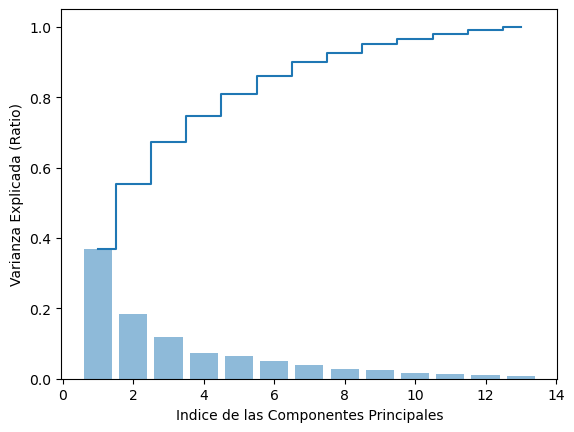

In [439]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Varianza Explicada (Ratio)')
plt.xlabel('Indice de las Componentes Principales')
plt.show()


In [440]:
X_train_pca.shape


(124, 13)

**¿Cuánto contribuyen las características a las Componenetes Principales?**

In [441]:
pca.components_.shape
pca.explained_variance_


array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.21357215,
       0.1808613 , 0.15362835, 0.10754642])

In [442]:
pca.components_.T * np.sqrt(pca.explained_variance_)


array([[-3.02018404e-01,  7.81895450e-01, -1.71410478e-01,
        -3.23153045e-03, -2.66625736e-01, -2.43366965e-01,
        -5.69117802e-02,  2.16725465e-01, -2.22926311e-01,
        -1.73135111e-01, -1.11777607e-01,  5.01053166e-02,
         3.09863159e-02],
       [ 5.44089424e-01,  2.56268630e-01,  1.19646716e-01,
         5.51624618e-01,  8.21439376e-02, -5.10202452e-01,
         1.97259514e-01,  7.40373561e-03,  6.18109097e-02,
         6.35004393e-02,  1.13451054e-01, -3.16072748e-02,
        -8.64628855e-03],
       [-5.60093818e-02,  3.80140862e-01,  8.43404129e-01,
        -1.06842283e-01, -1.47553427e-01, -3.16623058e-04,
        -9.52655986e-02, -1.04530631e-01,  2.14039991e-01,
        -2.13315368e-01,  4.91376938e-02, -6.58189138e-03,
        -4.68130063e-02],
       [ 4.55408287e-01, -1.76464625e-01,  7.77782099e-01,
         3.31562024e-02,  4.73273183e-02,  3.30218077e-02,
        -1.61261417e-01,  2.59352653e-01, -1.36188668e-01,
         1.93614837e-01, -8.48358888e

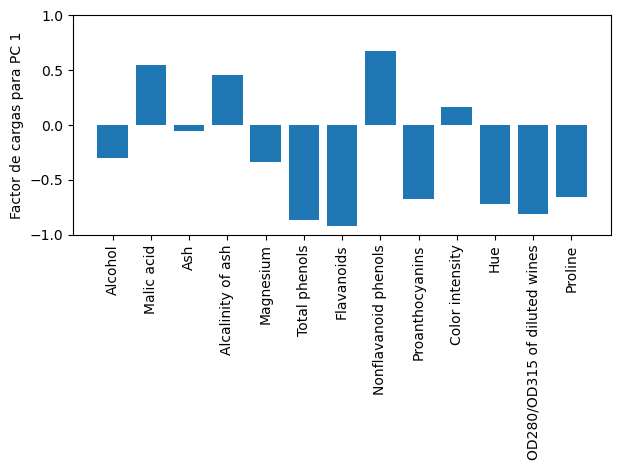

In [443]:
factor_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots()
ax.bar(range(13), factor_loadings[:, 0], align='center')
ax.set_ylabel('Factor de cargas para PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()


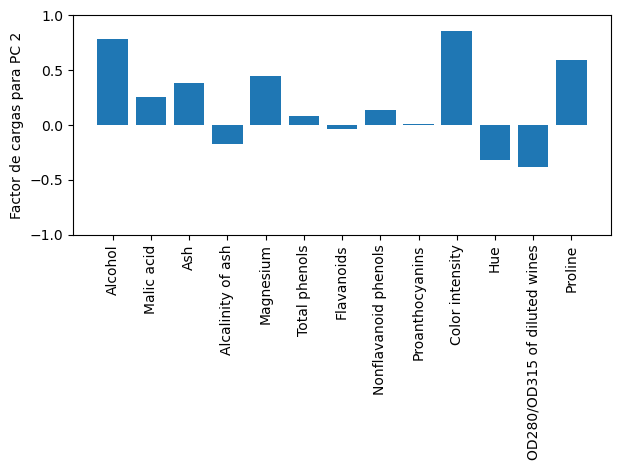

In [444]:
fig, ax = plt.subplots()
ax.bar(range(13), factor_loadings[:, 1], align='center')
ax.set_ylabel('Factor de cargas para PC 2')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
#plt.savefig('figures/05_05_03.png', dpi=300)
plt.show()

##  Ejercicios

Considere la base de datos Bonus del Control 2.

-   Seleccione todas las variables numéricas, restaurando las que están dañadas.
-   Elimine todas los valores extremos y complete los faltantes usando el promedio
-   Aplique el algoritmo PCA y reduzca los datos numéricos a dimension 3.
-   Describa el aporte de cada variable a las tres componentes principales.

In [445]:
# BONUS (1 punto extra)
# Descargue de campus virtual el archivo `Bonus.csv`, lea el archivo `Bonus.csv` como un dataframe de Pandas. 
# `Seleccione las mismas 11 columnas de la pregunta 2`. Observe que algunas de las columnas de naturaleza numérica,
#  continuas y discretas, no se les reconoce como tal por tener un `_` acompañando el número.
#  Limpie las correspondientes columnas con este problema y cambie los valores a tipo numérico, según corresponda. 
# Repita los pasos realizados en la pregunta 3 guardando esta vez el dataframe resultante como `Bonus_limpio.csv`
#  (debe subir este archivo e incluir los códigos para obtener puntaje del bonus).
df=pd.read_csv("Bonus.csv")
df.describe(include="all")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800.000000,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,NaN,3
top,0x3a63,CUS_0x37d2,February,Stevex,38,#F%$D@*&8,_______,17273.83,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,NaN,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,NaN,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,402.551290,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,213.915767,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,270.114473,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,336.742315,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,470.220186,NaN


In [446]:
df_util= df.loc[:,["Credit_Score","Age","Annual_Income","Monthly_Inhand_Salary",
                    "Num_of_Loan", "Changed_Credit_Limit", "Credit_Mix",
                    "Num_Credit_Inquiries", "Payment_Behaviour",
                    "Monthly_Balance", "Payment_of_Min_Amount"]].copy()
df_util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Credit_Score           100000 non-null  object 
 1   Age                    100000 non-null  object 
 2   Annual_Income          100000 non-null  object 
 3   Monthly_Inhand_Salary  84998 non-null   float64
 4   Num_of_Loan            100000 non-null  object 
 5   Changed_Credit_Limit   100000 non-null  object 
 6   Credit_Mix             100000 non-null  object 
 7   Num_Credit_Inquiries   98035 non-null   float64
 8   Payment_Behaviour      100000 non-null  object 
 9   Monthly_Balance        98800 non-null   float64
 10  Payment_of_Min_Amount  100000 non-null  object 
dtypes: float64(3), object(8)
memory usage: 8.4+ MB


In [447]:
# df_util.head(20)
def convierte_a_float(x):
    if x.find('_')!=-1:
        x=x.replace('_','')
    return float(x)
    
df_util['Num_of_Loan']=df_util['Num_of_Loan'].apply(convierte_a_float)
df_util['Age']=df_util['Age'].apply(convierte_a_float)
df_util['Annual_Income']=df_util['Annual_Income'].apply(convierte_a_float)
# df_util['Changed_Credit_Limit']=df_util['Changed_Credit_Limit'].apply(convierte_a_float)



In [448]:
df_util["Num_of_Loan"].astype(float)
df_util["Age"].astype(float)
df_util["Annual_Income"].astype(float)
# df_util["Changed_Credit_Limit"].astype(float)


0         29044.290
1         17919.005
2         14439.780
3         44678.570
4        127464.800
            ...    
99995      8126.595
99996    121237.530
99997    457224.000
99998     69083.080
99999    147510.760
Name: Annual_Income, Length: 100000, dtype: float64

In [449]:
df_util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Credit_Score           100000 non-null  object 
 1   Age                    100000 non-null  float64
 2   Annual_Income          100000 non-null  float64
 3   Monthly_Inhand_Salary  84998 non-null   float64
 4   Num_of_Loan            100000 non-null  float64
 5   Changed_Credit_Limit   100000 non-null  object 
 6   Credit_Mix             100000 non-null  object 
 7   Num_Credit_Inquiries   98035 non-null   float64
 8   Payment_Behaviour      100000 non-null  object 
 9   Monthly_Balance        98800 non-null   float64
 10  Payment_of_Min_Amount  100000 non-null  object 
dtypes: float64(6), object(5)
memory usage: 8.4+ MB


In [450]:
def noesconvertible_a_float(x):
    try:
        y= float(x)
        return False
    except ValueError:
        return True
    
def convierte_a_float2(x):
    if x.find('_')!=-1:
        x=x.replace('_','0')
    return float(x)
df_util['Changed_Credit_Limit']=df_util['Changed_Credit_Limit'].apply(convierte_a_float2)

df_util["Changed_Credit_Limit"].astype(float)


0         4.69
1         8.44
2        11.85
3        10.41
4        10.98
         ...  
99995     8.27
99996     2.66
99997    26.07
99998     8.70
99999    -2.03
Name: Changed_Credit_Limit, Length: 100000, dtype: float64

In [451]:
df_util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Credit_Score           100000 non-null  object 
 1   Age                    100000 non-null  float64
 2   Annual_Income          100000 non-null  float64
 3   Monthly_Inhand_Salary  84998 non-null   float64
 4   Num_of_Loan            100000 non-null  float64
 5   Changed_Credit_Limit   100000 non-null  float64
 6   Credit_Mix             100000 non-null  object 
 7   Num_Credit_Inquiries   98035 non-null   float64
 8   Payment_Behaviour      100000 non-null  object 
 9   Monthly_Balance        98800 non-null   float64
 10  Payment_of_Min_Amount  100000 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.4+ MB


In [452]:
df_util["Payment_of_Min_Amount"].loc[df_util["Payment_of_Min_Amount"]=="Yes"]=0
df_util["Payment_of_Min_Amount"].loc[df_util["Payment_of_Min_Amount"]=="No"]=1
df_util["Payment_of_Min_Amount"].loc[df_util["Payment_of_Min_Amount"]=="NM"]=3

df_util["Credit_Mix"].loc[df_util["Credit_Mix"]=="Standard"]=0
df_util["Credit_Mix"].loc[df_util["Credit_Mix"]=="Good"]=1
df_util["Credit_Mix"].loc[df_util["Credit_Mix"]=="_"]=2
df_util["Credit_Mix"].loc[df_util["Credit_Mix"]=="Bad"]=3
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="High_spent_Small_value_payments"]=0
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="Low_spent_Large_value_payments"]=1
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="!@9#%8"]=2
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="Low_spent_Small_value_payments"]=3
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="High_spent_Medium_value_payments"]=4
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="High_spent_Large_value_payments"]=5
df_util["Payment_Behaviour"].loc[df_util["Payment_Behaviour"]=="Low_spent_Medium_value_payments"]=6



df_util["Payment_of_Min_Amount"].astype(float)
df_util["Credit_Mix"].astype(float)
df_util["Payment_Behaviour"].astype(float)

C:\Users\newma\AppData\Local\Temp\ipykernel_8664\1271381541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_util["Payment_of_Min_Amount"].loc[df_util["Payment_of_Min_Amount"]=="Yes"]=0
C:\Users\newma\AppData\Local\Temp\ipykernel_8664\1271381541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_util["Payment_of_Min_Amount"].loc[df_util["Payment_of_Min_Amount"]=="No"]=1
C:\Users\newma\AppData\Local\Temp\ipykernel_8664\1271381541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

0        3.0
1        2.0
2        4.0
3        5.0
4        4.0
        ... 
99995    3.0
99996    5.0
99997    3.0
99998    3.0
99999    6.0
Name: Payment_Behaviour, Length: 100000, dtype: float64

In [453]:
df_util.describe(include="all")

,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Changed_Credit_Limit,Credit_Mix,Num_Credit_Inquiries,Payment_Behaviour,Monthly_Balance,Payment_of_Min_Amount
count,100000,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.000000,100000.0,98035.000000,100000.0,98800.000000,100000.0
unique,3,NaN,NaN,NaN,NaN,NaN,4.0,NaN,7.0,NaN,3.0
top,Standard,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,0.0
freq,53174,NaN,NaN,NaN,NaN,NaN,36479.0,NaN,25513.0,NaN,52326.0
mean,NaN,110.649700,1.764157e+05,4194.170850,3.009960,10.171791,NaN,27.754251,NaN,402.551290,NaN
std,NaN,686.244717,1.429618e+06,3183.686167,62.647879,6.880628,NaN,193.177339,NaN,213.915767,NaN
min,NaN,-500.000000,7.005930e+03,303.645417,-100.000000,-6.490000,NaN,0.000000,NaN,0.007760,NaN
25%,NaN,24.000000,1.945750e+04,1625.568229,1.000000,4.970000,NaN,3.000000,NaN,270.114473,NaN
50%,NaN,33.000000,3.757861e+04,3093.745000,3.000000,9.250000,NaN,6.000000,NaN,336.742315,NaN
75%,NaN,42.000000,7.279092e+04,5957.448333,5.000000,14.660000,NaN,9.000000,NaN,470.220186,NaN


In [454]:
X_new=df_util.iloc[:,1:].copy().values
y_new=df_util.iloc[:,:1].copy().values



In [455]:
from sklearn.model_selection import train_test_split
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3,random_state=1, stratify=y_new)


In [456]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_new_train_std = sc.fit_transform(X_new_train)
X_new_test_std = sc.transform(X_new_test)

In [ ]:
X_new_train_std

In [460]:
from sklearn.decomposition import PCA
pca = PCA()
X_new_train_pca = pca.fit_transform(X_new_train_std)
pca.explained_variance_ratio_


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').